In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


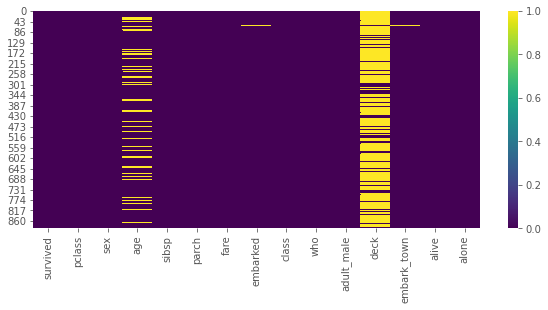

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(10,4))
sns.heatmap(titanic.isnull(),cmap='viridis')
plt.show()

### Univariate Analysis

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

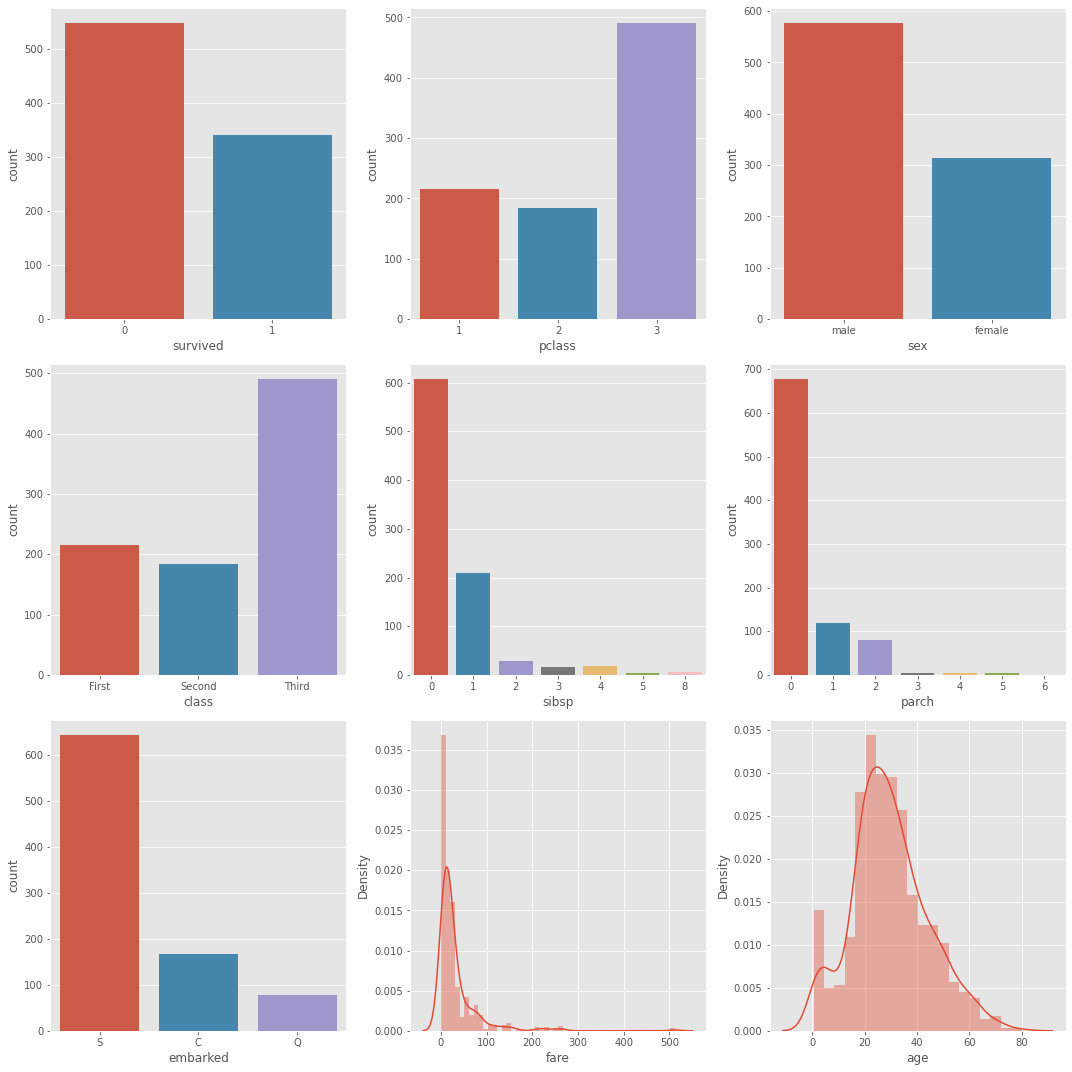

In [7]:
fig,ax = plt.subplots(3,3,figsize=(15,15))
sns.countplot('survived',data=titanic,ax=ax[0][0])
sns.countplot('pclass',data=titanic,ax=ax[0][1])
sns.countplot('sex',data=titanic,ax=ax[0][2])
sns.countplot('class',data=titanic,ax=ax[1][0])
sns.countplot('sibsp',data=titanic,ax=ax[1][1])
sns.countplot('parch',data=titanic,ax=ax[1][2])
sns.countplot('embarked',data=titanic,ax=ax[2][0])

sns.distplot(titanic['fare'],ax=ax[2][1])
sns.distplot(titanic['age'],ax=ax[2][2])

plt.tight_layout()

### Survived

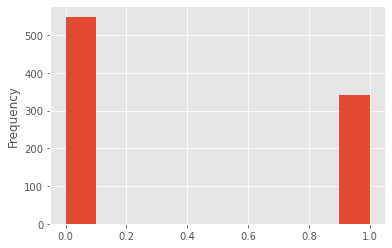

In [8]:
titanic['survived'].plot.hist()
plt.show()

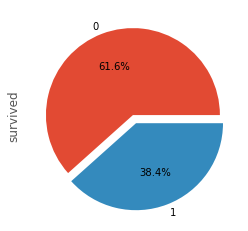

In [9]:
explode= [0,0.1]
titanic['survived'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode)
plt.show()

### Pclass

In [10]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [11]:
titanic.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

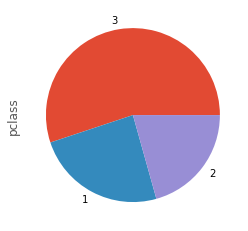

In [12]:
titanic['pclass'].value_counts().plot(kind='pie')
plt.show()

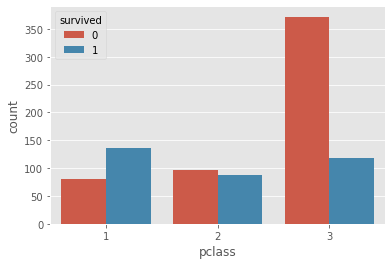

In [13]:
sns.countplot(x='pclass',data=titanic,hue='survived')
plt.show()

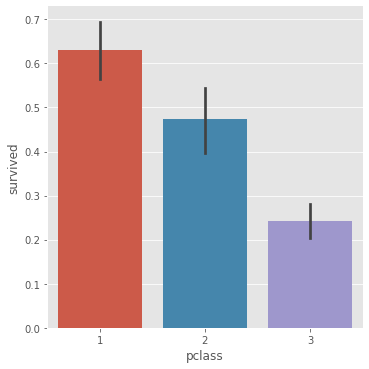

In [14]:
sns.catplot(x='pclass',y='survived',data=titanic,kind='bar')
plt.show()

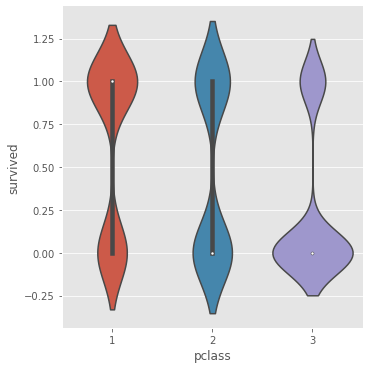

In [15]:
sns.catplot(x='pclass',y='survived',data=titanic,kind='violin')
plt.show()

### Sex

In [16]:
titanic.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

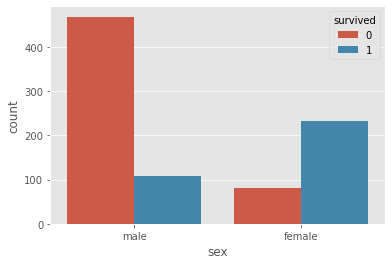

In [17]:
sns.countplot(x='sex',data=titanic,hue='survived')

<AxesSubplot:ylabel='sex'>

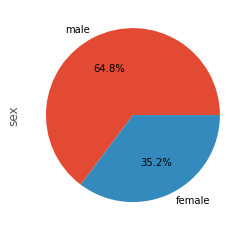

In [18]:
titanic['sex'].value_counts().plot.pie(autopct='%1.1f%%')

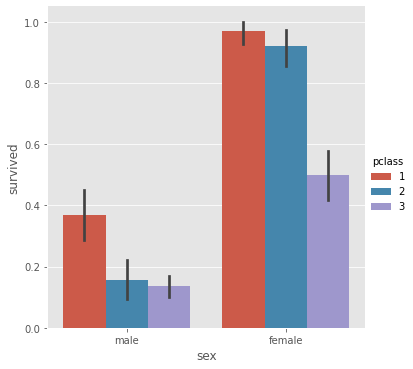

In [19]:
sns.catplot(x='sex',y='survived',data=titanic,kind='bar',hue='pclass')

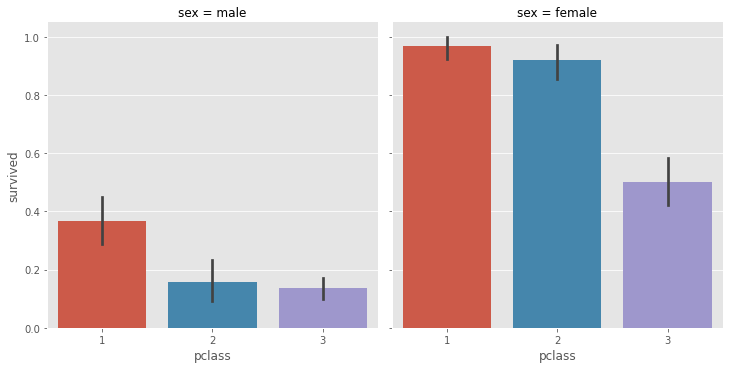

In [20]:
sns.catplot(x='pclass',y='survived',data=titanic,kind='bar',col='sex')
plt.show()

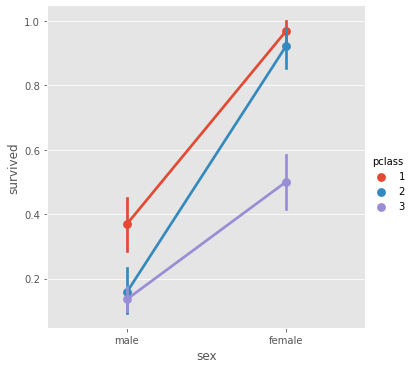

In [21]:
sns.catplot(x='sex',y='survived',kind='point',data=titanic,hue='pclass')

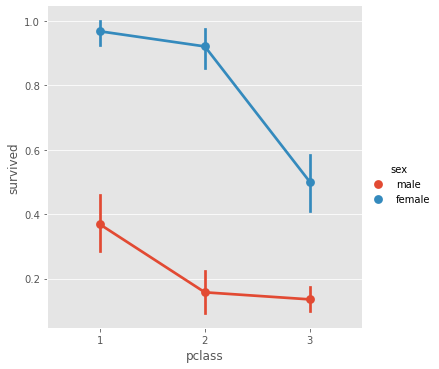

In [22]:
sns.catplot(x='pclass',y='survived',kind='point',data=titanic,hue='sex')

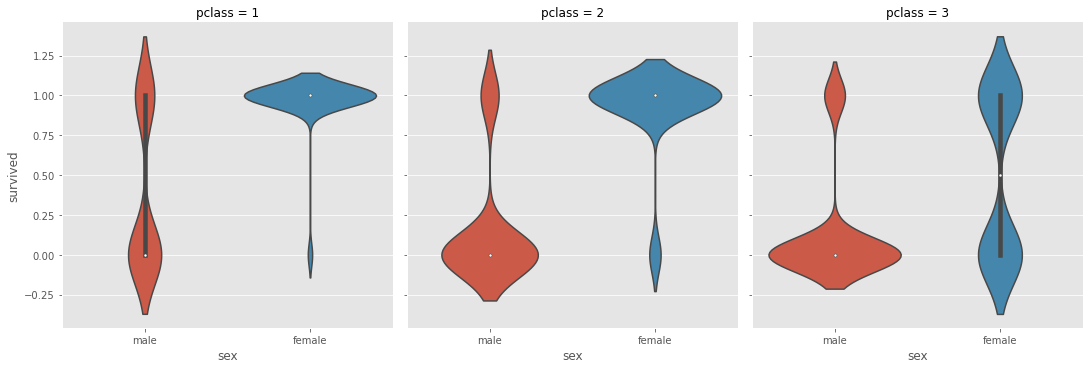

In [23]:
sns.catplot(x='sex',y='survived',data=titanic,kind='violin',col='pclass')

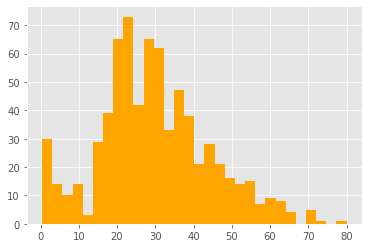

In [24]:
titanic['age'].hist(bins=30,color='orange')
plt.show()

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

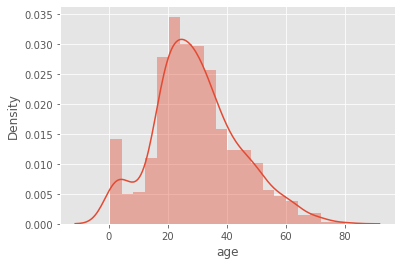

In [25]:
sns.distplot(titanic['age'])

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

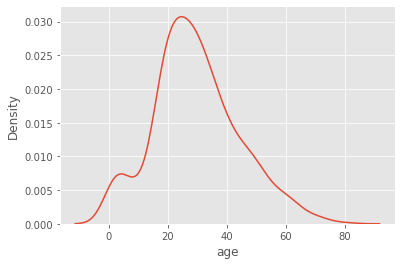

In [26]:
sns.distplot(titanic['age'],hist=False)

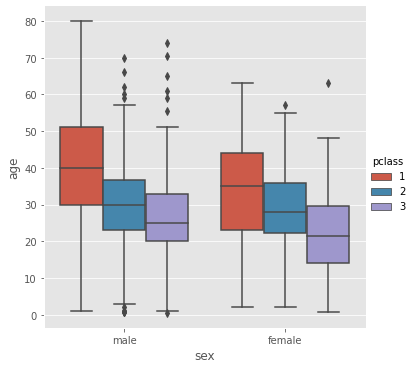

In [27]:
sns.catplot(x='sex',y='age',data=titanic,kind='box',hue='pclass')

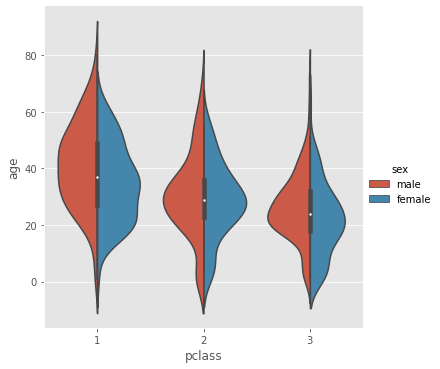

In [28]:
sns.catplot(x='pclass',y='age',data=titanic,kind='violin',hue='sex',split=True)

D:\ANACONDA\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


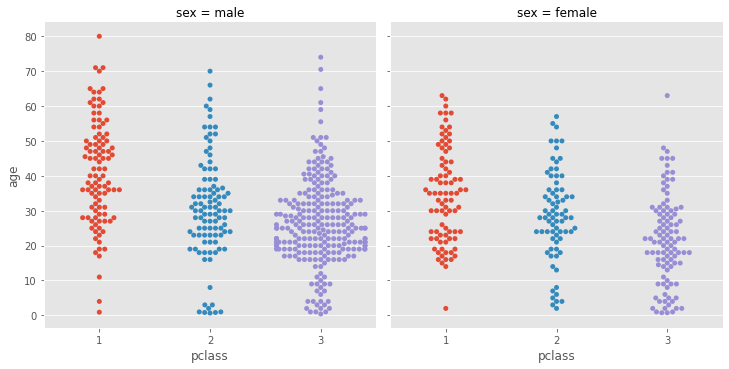

In [29]:
sns.catplot(x='pclass',y='age',data=titanic,kind='swarm',col='sex')

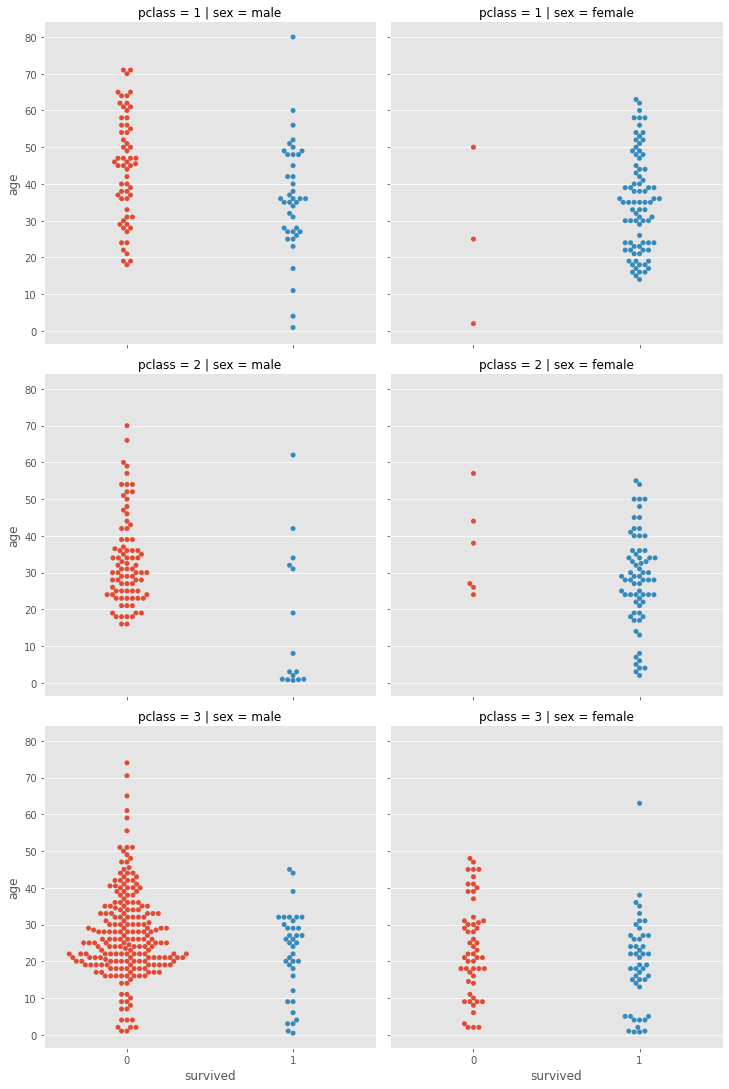

In [30]:
sns.catplot(x='survived',y='age',data=titanic,kind='swarm',col='sex',row='pclass')

### Fare

<AxesSubplot:>

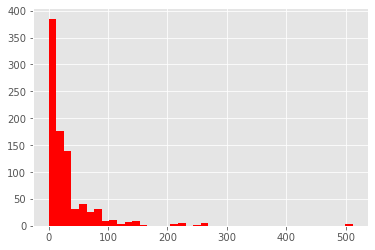

In [36]:
titanic['fare'].hist(bins=40,color='r')

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


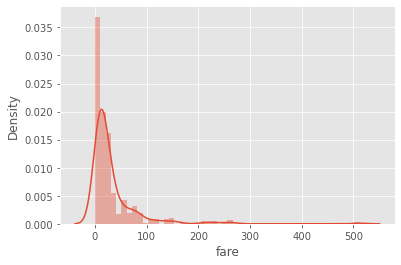

In [38]:
sns.distplot(titanic['fare'])
plt.show()

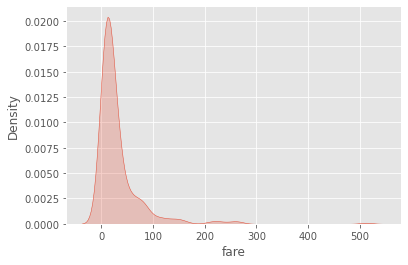

In [40]:
sns.kdeplot(titanic['fare'],shade=True)
plt.show()

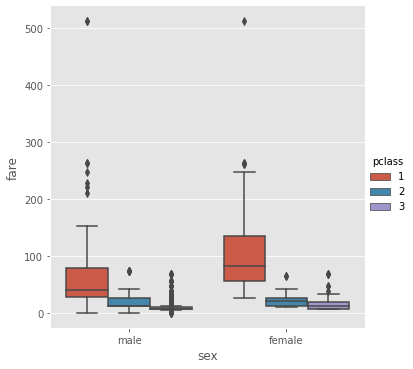

In [44]:
sns.catplot(x='sex',y='fare',data=titanic,kind='box',hue='pclass')
plt.show()

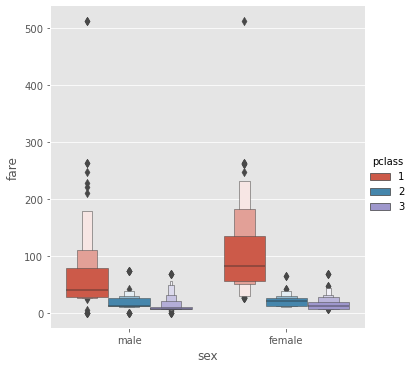

In [45]:
sns.catplot(x='sex',y='fare',data=titanic,kind='boxen',hue='pclass')

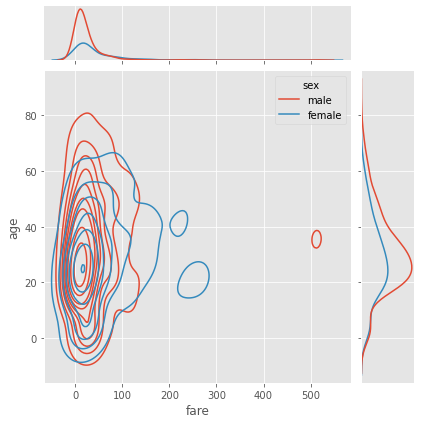

In [48]:
sns.jointplot(x='fare',y='age',data=titanic,hue='sex',kind='kde')

### sibsp

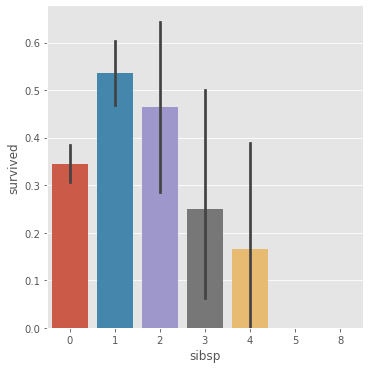

In [50]:
sns.catplot(x='sibsp',y='survived',data=titanic,kind='bar')

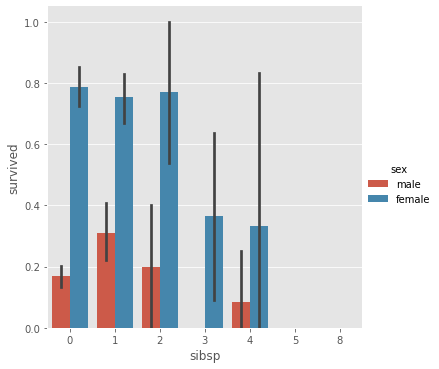

In [56]:
sns.catplot(x='sibsp',y='survived',data=titanic,kind='bar',hue='sex')

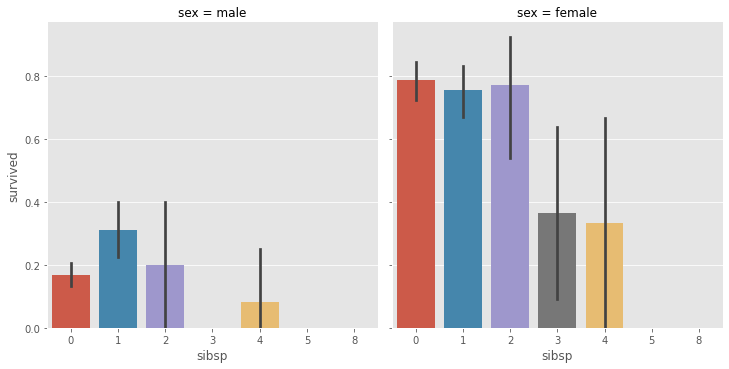

In [57]:
sns.catplot(x='sibsp',y='survived',data=titanic,kind='bar',col='sex')

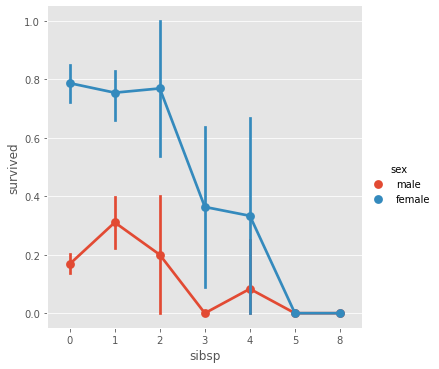

In [59]:
sns.catplot(x='sibsp',y='survived',data=titanic,kind='point',hue='sex')

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

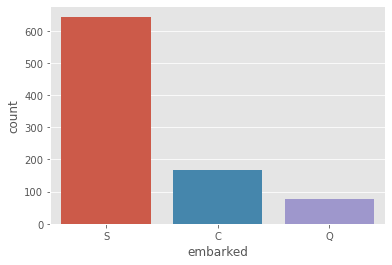

In [61]:
sns.countplot('embarked',data=titanic)

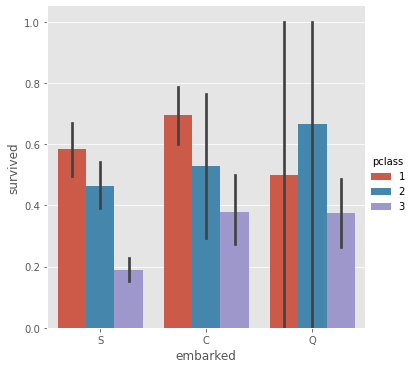

In [65]:
sns.catplot(x='embarked',y='survived',data=titanic,kind='bar',hue='pclass')

### Who

In [66]:
titanic_who = sns.load_dataset('titanic')

In [67]:
titanic_who.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


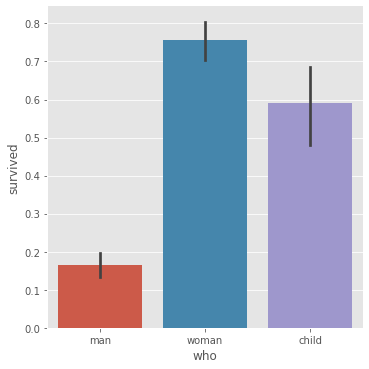

In [70]:
sns.catplot(x='who',y='survived',data=titanic,kind='bar')

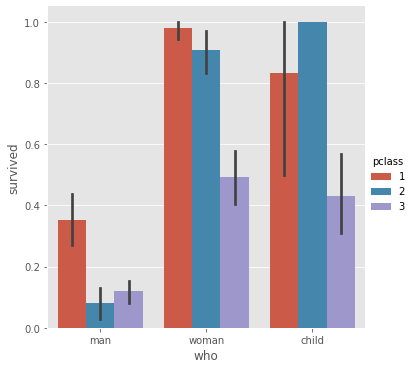

In [71]:
sns.catplot(x='who',y='survived',data=titanic,kind='bar',hue='pclass')